In [36]:
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division
from numpy.random import multinomial, multivariate_normal
import MFCC
from scipy.io import wavfile
import os
import gmmhmm
%matplotlib inline

In [7]:
def sample_gmmhmm(gmmhmm, n_sim):
    """
    Simulates sampling from a gmmhmm with N states and M observation types from K-dimensional gaussians
    
    Inputs:
    gmmhmm: A list of the form [A, weights, means, covars, pi] containing component parts of a gmmhmm, as follows:
        --A: Row stochastic NxN matrix giving transition probabilities between gmmhmm states
        --weights: Row stochastic MxN matrix giving where weights[i,j] gives the probability of observing j in state i
                    (In other words, the probability of drawing j from our multinomial)
        --means: NxMxK array of the mean vectors for each of the gaussians for each of the hidden states
        --covars:  NxMxMxK Array of the covariance matrices of the gaussians for each of the hidden states
        --pi:  Stochastic Nx1 array detailing probabilities of being in each of our initial states
        
    n_sim:  How many draws to take from our GMMHMM model
        
    Returns:
    states:  n_sim x 1 array of states
    obs:  n_sim x K array of observations 
    """
    #Extract necessary pieces of GMMHMM from function parameters
    A = gmmhmm[0]
    weights = gmmhmm[1]
    means = gmmhmm[2]
    covars = gmmhmm[3]
    pi = gmmhmm[4]
    
    states = []
    obs = []
    
    for i in xrange(n_sim):
        state = np.argmax(multinomial(1, pi))
        draw = np.argmax(multinomial(1, weights[state,:]))
        ob = multivariate_normal(means[state, draw, :], covars[state, draw, :,:])
        states.append(state)
        obs.append(ob)
        pi = A[state,:]
        
    return np.array(states), np.array(obs)

In [8]:
A = np.array([[.65, .35], [.15, .85]])
pi = np.array([.8, .2])
weights = np.array([[.7, .2, .1], [.1, .5, .4]])
means1 = np.array([[0., 17., -4.], [5., -12., -8.], [-16., 22., 2.]])
means2 = np.array([[-5., 3., 23.], [-12., -2., 14.], [15., -32., 0.]])
means = np.array([means1, means2])
covars1 = np.array([5*np.eye(3), 7*np.eye(3), np.eye(3)])
covars2 = np.array([10*np.eye(3), 3*np.eye(3), 4*np.eye(3)])
covars = np.array([covars1, covars2])
gmmhmm = [A, weights, means, covars, pi]

#print sample_gmmhmm(gmmhmm, 100)

(array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1]), array([[ -2.84565595e+00,   1.18650204e+01,  -1.98924441e+00],
       [ -1.20231620e+01,  -1.92924345e+00,   1.57936434e+01],
       [ -2.96768115e+00,   2.73922876e+00,   2.69741021e+01],
       [  4.13052563e+00,   1.46359454e+01,  -3.67157272e+00],
       [ -3.37795788e+00,   1.45277616e+01,  -6.42526224e-01],
       [  1.29777400e+01,  -3.29602470e+01,  -1.46424788e+00],
       [  2.73078740e-02,   1.38438440e+01,  -5.67121907e+00],
       [ -1.43734222e+01,  -1.40921147e+00,   1.41494686e+01],
       [ -5.37836389e+00,   5.89908052e+00,   2.54008046e+01],
       [  1.65605768e+01,  -3.35877118e+01,  -1.65305366e-01],
       [ -1.21681008e+01,  -2.60

['.DS_Store', 'Biology (1).wav', 'Biology (10).wav', 'Biology (11).wav', 'Biology (12).wav', 'Biology (13).wav', 'Biology (14).wav', 'Biology (15).wav', 'Biology (16).wav', 'Biology (17).wav', 'Biology (18).wav', 'Biology (19).wav', 'Biology (2).wav', 'Biology (20).wav', 'Biology (21).wav', 'Biology (22).wav', 'Biology (23).wav', 'Biology (24).wav', 'Biology (25).wav', 'Biology (26).wav', 'Biology (27).wav', 'Biology (28).wav', 'Biology (29).wav', 'Biology (3).wav', 'Biology (30).wav', 'Biology (4).wav', 'Biology (5).wav', 'Biology (6).wav', 'Biology (7).wav', 'Biology (8).wav', 'Biology (9).wav', 'Biology00.wav', 'Mathematics (1).wav', 'Mathematics (10).wav', 'Mathematics (11).wav', 'Mathematics (12).wav', 'Mathematics (13).wav', 'Mathematics (14).wav', 'Mathematics (15).wav', 'Mathematics (16).wav', 'Mathematics (17).wav', 'Mathematics (18).wav', 'Mathematics (19).wav', 'Mathematics (2).wav', 'Mathematics (20).wav', 'Mathematics (21).wav', 'Mathematics (22).wav', 'Mathematics (23).wa

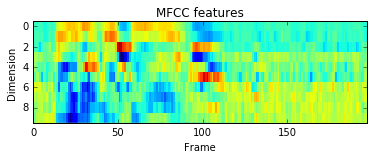

In [35]:
stats = []
psych = []
bio = []
math = []
poly_sci = []

for i in xrange(1,31):
    stats.append(MFCC.extract(wavfile.read("./audio_files/Statistics ({0}).wav".format(i))[1]))
    bio.append(MFCC.extract(wavfile.read("./audio_files/Biology ({0}).wav".format(i))[1]))
    math.append(MFCC.extract(wavfile.read("./audio_files/Mathematics ({0}).wav".format(i))[1]))
    psych.append(MFCC.extract(wavfile.read("./audio_files/Psychology ({0}).wav".format(i))[1]))
    poly_sci.append(MFCC.extract(wavfile.read("./audio_files/PoliticalScience ({0}).wav".format(i))[1]))

In [38]:
startprob, transmat = gmmhmm.initialize(5)

AttributeError: 'module' object has no attribute 'initialize'